In [71]:
import numpy as np
import matplotlib.pyplot as plt

# if scienceplots is available, use it
try:
    import scienceplots
    plt.style.use('science')
except ImportError:
    print('scienceplots not available, using default style')
    pass


In [72]:
def movingAverage(data, window_size):
    cumsum = np.cumsum(np.insert(data, 0, 0))
    return (cumsum[window_size:] - cumsum[:-window_size]) / window_size

In [73]:
path = "logs/"
path += "240513_121223_SmallGrid"
mapName = "smallGrid"
humanScore = 97

gameLength = np.load(f"{path}/game_length_tracker.npy")
rewards = np.load(f"{path}/reward_tracker.npy")

window_size = 100
gameLengthMA = movingAverage(gameLength, window_size)
rewardsMA = movingAverage(rewards, window_size)


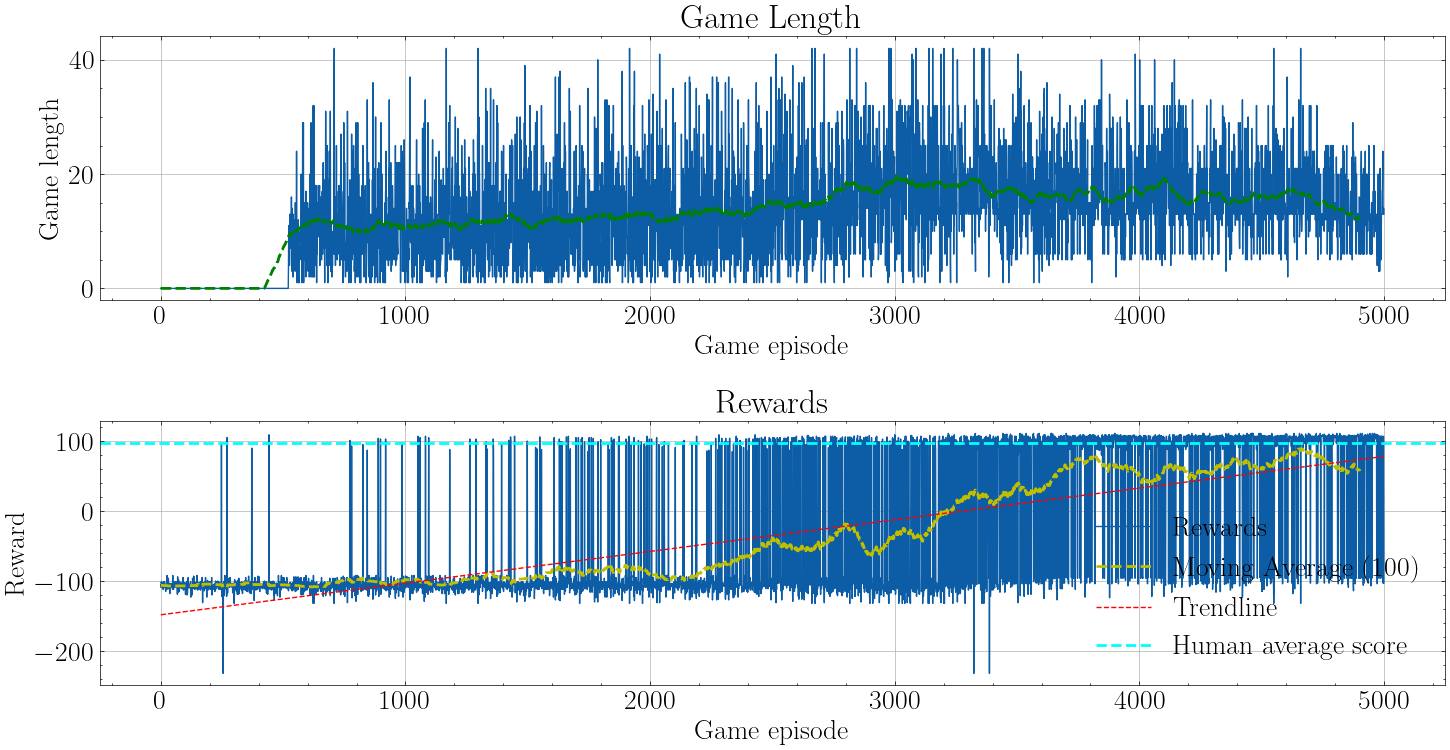

In [74]:
plt.figure(figsize=(15, 8))
plt.subplot(211)
plt.plot(gameLength)
plt.plot(gameLengthMA, 'g--', label=f'Moving Average ({window_size})', linewidth = 2)
plt.title('Game Length')
plt.xlabel('Game episode')
plt.ylabel('Game length')
plt.grid()

plt.subplot(212)
plt.plot(rewards, label = 'Rewards')
plt.plot(rewardsMA, 'y--', label=f'Moving Average ({window_size})', linewidth = 2)
plt.title('Rewards')
plt.xlabel('Game episode')
plt.ylabel('Reward')
plt.grid()

# trendline
z = np.polyfit(np.arange(len(rewards)), rewards, 1)
p = np.poly1d(z)
plt.plot(p(np.arange(len(rewards))), 'r--', label='Trendline')


## add horizontal line at y=97

plt.axhline(y=humanScore, color="cyan", linestyle='--', linewidth = 2, label="Human average score")

plt.legend()


plt.tight_layout()

# save the plot
# plt.savefig(f"{path}/plot.eps", format="eps")

plt.show()

Mask to only show episodes with reward > 50


In [75]:
# mask the arrays to only contain the element with a reward higher than 50
mask = rewards > 50
gameLengthMasked = gameLength[mask]
rewardsMasked = rewards[mask]

window_size = 100
gameLengthMA = movingAverage(gameLengthMasked, window_size)
rewardsMA = movingAverage(rewardsMasked, window_size)

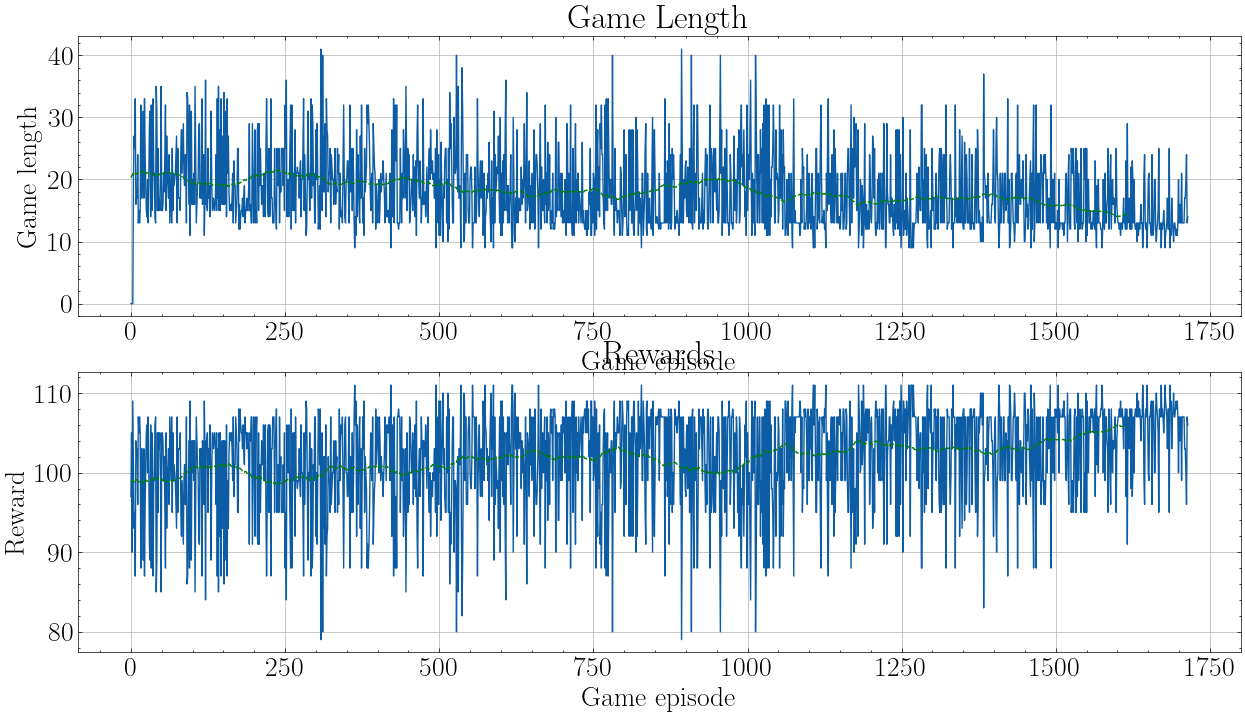

In [76]:
plt.figure(figsize=(15, 8))
plt.subplot(211)
plt.plot(gameLengthMasked)
plt.plot(gameLengthMA, 'g--', label=f'Moving Average ({window_size})')
plt.title('Game Length')
plt.xlabel('Game episode')
plt.ylabel('Game length')
plt.grid()

plt.subplot(212)
plt.plot(rewardsMasked, label = 'Rewards')
plt.plot(rewardsMA, 'g--', label=f'Moving Average ({window_size})')
plt.title('Rewards')
plt.xlabel('Game episode')
plt.ylabel('Reward')
plt.grid()



Poster Plots


In [77]:
gameLength = np.load(f"{path}/game_length_tracker.npy")
rewards = np.load(f"{path}/reward_tracker.npy")

window_size = 100
gameLengthMA = movingAverage(gameLength, window_size)
rewardsMA = movingAverage(rewards, window_size)

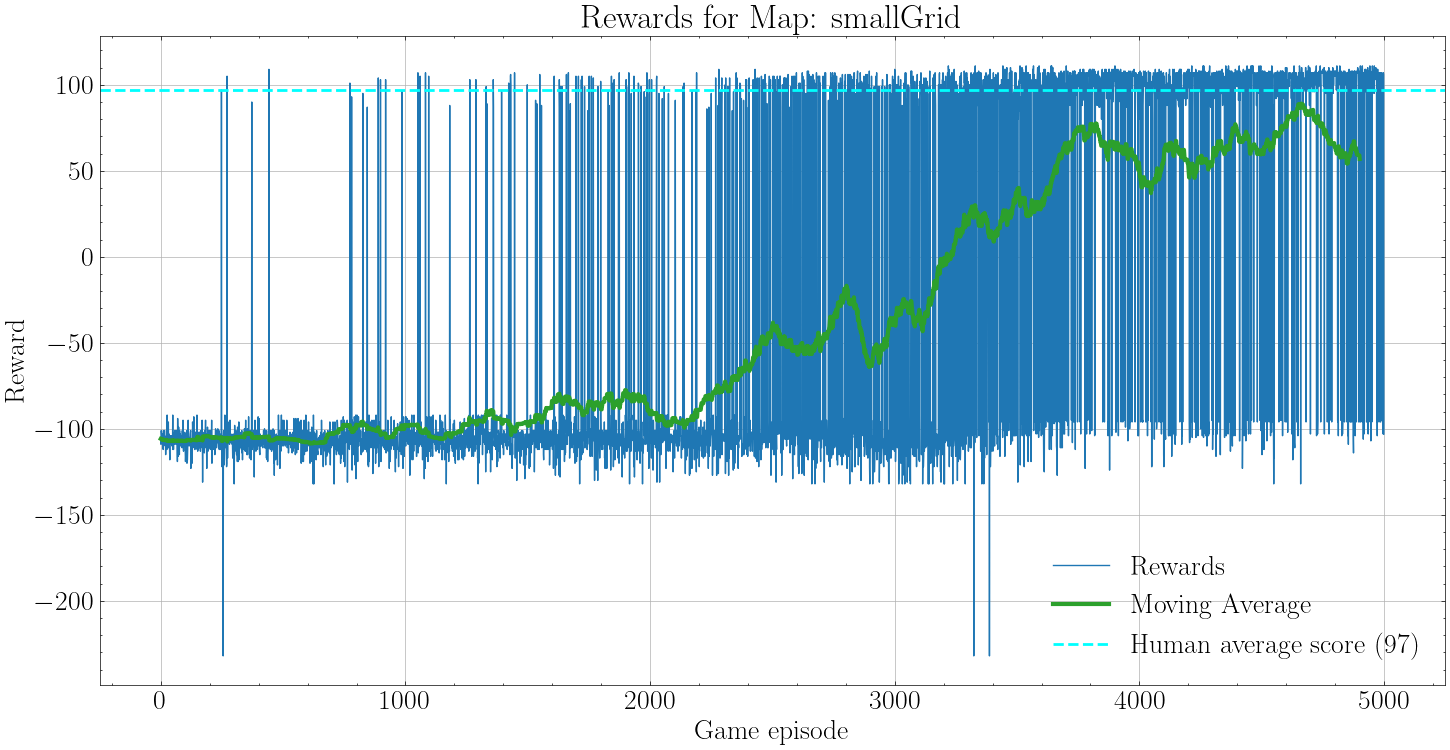

In [78]:
# Plot for Poster

plt.rcParams['font.size'] = 20
plt.figure(figsize=(15, 8))
plt.plot(rewards, 'tab:blue',label = 'Rewards')
plt.plot(rewardsMA, 'tab:green', label=f'Moving Average', linewidth = 3)
plt.title('Rewards for Map: ' + mapName)
plt.xlabel('Game episode')
plt.ylabel('Reward')
plt.grid()

# # trendline
# z = np.polyfit(np.arange(len(rewards)), rewards, 1)
# p = np.poly1d(z)
# plt.plot(p(np.arange(len(rewards))), 'tab:orange', label='Trendline', linewidth = 2)

## add human score
plt.axhline(y=humanScore, color="cyan", linestyle='--', linewidth = 2, label="Human average score" + f" ({humanScore})")

plt.legend()

plt.tight_layout()

# save the plot
plt.savefig(f"{path}/PosterPlot_"+ mapName +".eps", format="eps")

plt.show()

# Plot with the test results


In [79]:
smallGridEvaluationScores = []
mediumGridEvaluationScores = [125.0, 129.0, 129.0, 127.0, 129.0, 125.0, 127.0, 129.0, 125.0, 123.0, 129.0, 127.0, 127.0, 127.0, 129.0, 129.0, 129.0, 129.0, 127.0, 129.0, 127.0, 123.0, 127.0, 129.0, 129.0, 129.0, 127.0, 125.0, 129.0, 127.0, 127.0, 127.0, 129.0, 129.0, 129.0, 129.0, 123.0, 129.0, 127.0, 129.0, 129.0, 129.0, 129.0, 127.0, 123.0, 129.0, 129.0, 125.0, 123.0, 117.0]
smallClassicEvaluationScores = [521.0, 544.0, 133.0, 562.0, 325.0, 371.0, 299.0, 621.0, 613.0, 622.0, 473.0, 554.0, 514.0, 532.0, 610.0, 545.0, 572.0, 646.0, 572.0, 650.0, 638.0, 480.0, 595.0, 591.0, 603.0, 250.0, 860.0, 511.0, 449.0, 182.0, 547.0, 331.0, 482.0, 589.0, 305.0, 390.0, 625.0, 452.0, 931.0, 620.0, 838.0, 110.0, 380.0, 233.0, 471.0, 682.0, 544.0, 454.0, 264.0, 559.0]

def stringToList(string):
    return string.split(", ")

def WinToBinary(array):
    tmp = [1 if x == "Win" else 0 for x in array]
    return np.array(tmp)

smallGridEvaluationWins = []
stringSmallGrid = ""
stringMediumGrid = "Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win"
stringSmallClassic = "Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Win, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Win, Loss, Win, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss"
# convert string to list
smallGridEvaluationWins = stringToList(stringSmallGrid)
mediumGridEvaluationWins = stringToList(stringMediumGrid)
smallClassicEvaluationWins = stringToList(stringSmallClassic)



# convert to np
smallGridEvaluationScores = np.array(smallGridEvaluationScores)
mediumGridEvaluationScores = np.array(mediumGridEvaluationScores)




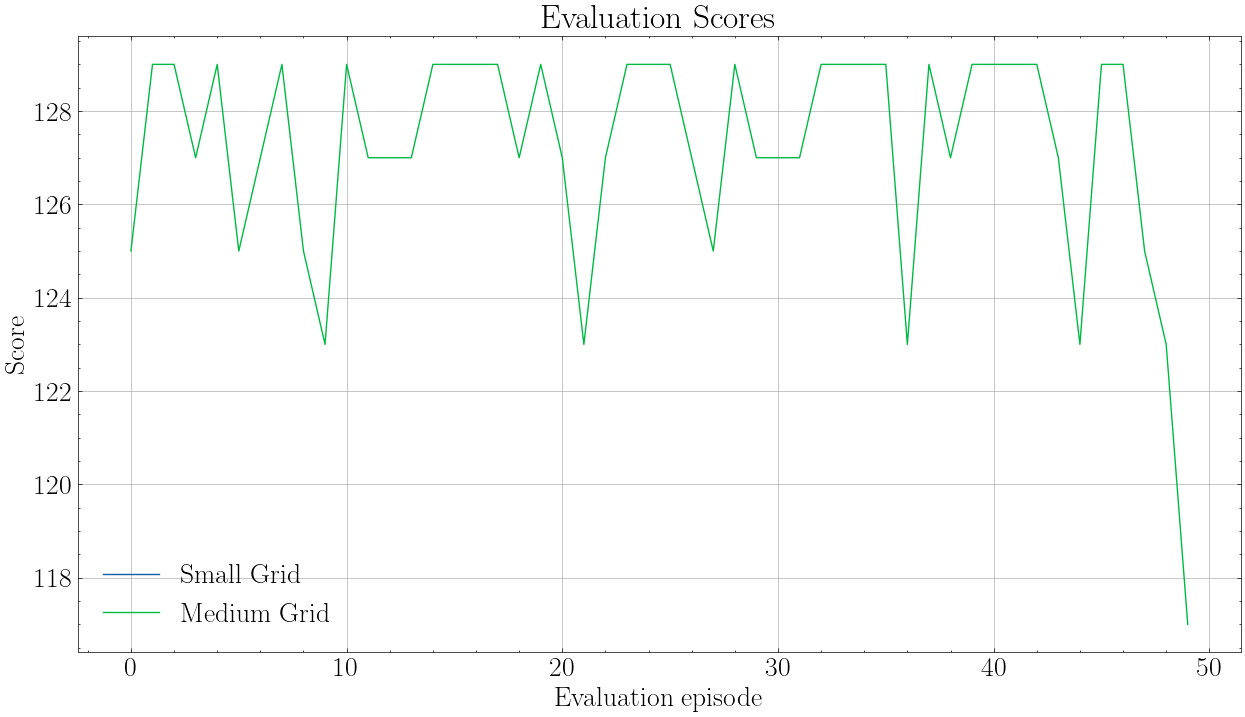

In [80]:
plt.figure(figsize=(15, 8))
plt.plot(smallGridEvaluationScores, label = 'Small Grid')
plt.plot(mediumGridEvaluationScores, label = 'Medium Grid')
plt.plot(smallClassicEvaluationScores, label = 'Small Classic')
plt.title('Evaluation Scores')
plt.xlabel('Evaluation episode')
plt.ylabel('Score')
plt.grid()
plt.legend()



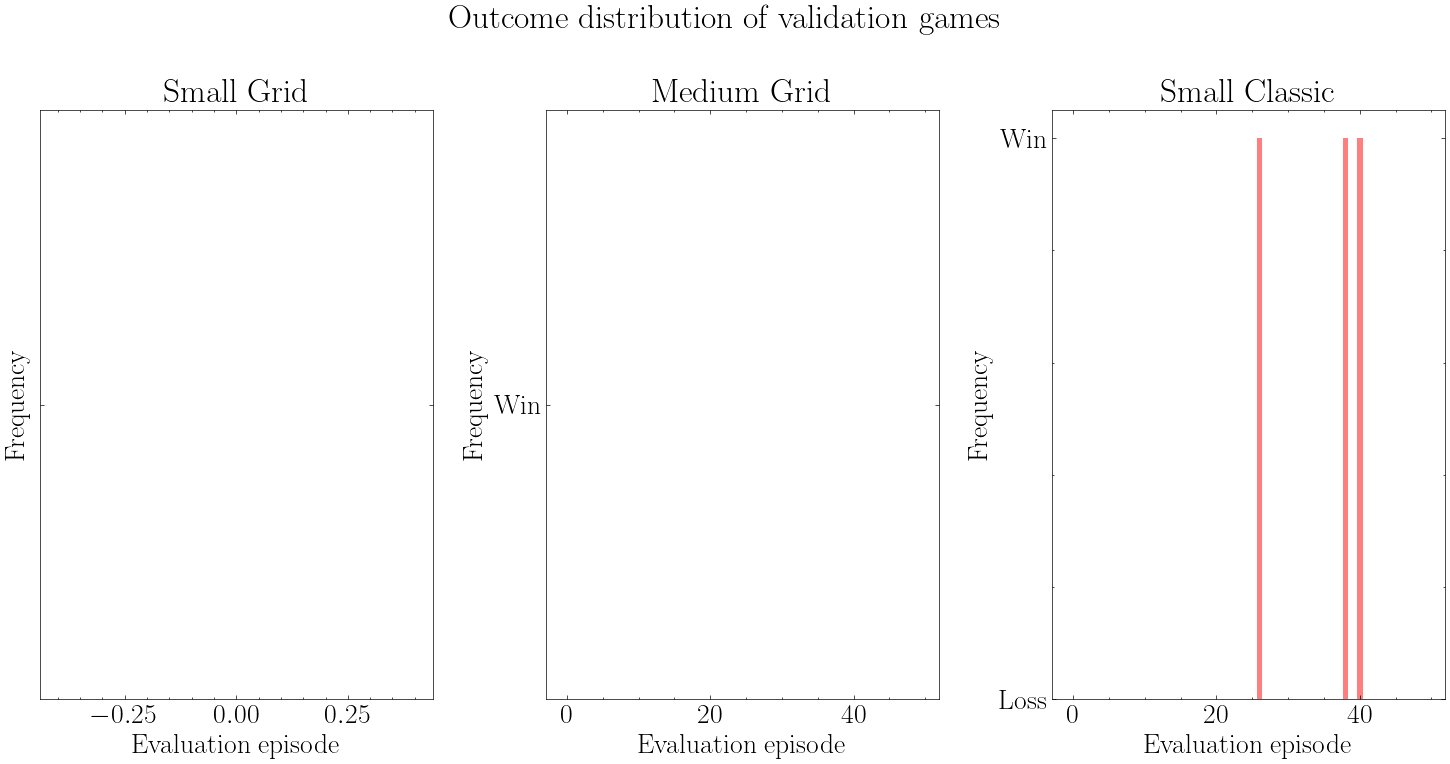

In [87]:
plt.figure(figsize=(15, 8))
labels = ['Win', 'Loss']

# smallGrid
plt.subplot(131)

win_count = smallGridEvaluationWins.count("Win")
loss_count = smallGridEvaluationWins.count("Loss")
values = [win_count, loss_count]
plt.bar(labels, values, color=['green', 'red'])plt.title('Small Grid')
plt.xlabel('Evaluation episode')
plt.ylabel('Frequency')

# mediumGrid
plt.subplot(132)
plt.bar(range(len(mediumGridEvaluationWins)), mediumGridEvaluationWins, color=['red' if win == 'Win' else 'blue' for win in mediumGridEvaluationWins], alpha=0.5)
plt.title('Medium Grid')
plt.xlabel('Evaluation episode')
plt.ylabel('Frequency')

# smallClassic
plt.subplot(133)
plt.bar(range(len(smallClassicEvaluationWins)), smallClassicEvaluationWins, color=['red' if win == 'Win' else 'blue' for win in smallClassicEvaluationWins], alpha=0.5)
plt.title('Small Classic')
plt.xlabel('Evaluation episode')
plt.ylabel('Frequency')

plt.suptitle('Outcome distribution of validation games')

plt.tight_layout()
plt.show()